In [1]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [2]:
pd.options.display.max_rows = 200000

In [3]:
df = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv', sep='\t')
df2 = pd.read_csv('drugsCom_raw/drugsComTest_raw.tsv', sep='\t')

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df2.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9.0,"September 13, 2009",46


In [6]:
frames = [df, df2]
data = pd.concat(frames)

In [7]:
data.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9.0,"September 13, 2009",46


In [46]:
data.sort_values(by=['date'])

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
110036,44753,Ramipril,High Blood Pressure,"""I have used altace for 5 yrs now and have fou...",9.0,"April 1, 2008",130
159280,62756,Citalopram,Depression,"""It is so nice to have my life back!!!""",10.0,"April 1, 2008",267
59644,145509,Zithromax,Otitis Media,"""this medicine absolutely did not help. have b...",1.0,"April 1, 2008",20
129132,43847,Acetaminophen / codeine,Pain,"""I take Acetaminophen w/Codeine #3. It helps ...",8.0,"April 1, 2008",14
28967,119667,Testosterone,"Hypogonadism, Male","""I&#039;m a 35 year old male and I had no idea...",9.0,"April 1, 2008",357
...,...,...,...,...,...,...,...
724,76408,Liraglutide,Obesity,"""I&#039;m a 45 yr old female, 5&#039;6&quot; t...",10.0,"September 9, 2017",16
51562,22576,Pylera,Helicobacter Pylori Infection,"""I&#039;m only on day 2 and I had to call out ...",1.0,"September 9, 2017",6
44644,231246,Trazodone,Insomnia,"""I started taking Trazadone 50mg after being d...",5.0,"September 9, 2017",18
87822,68522,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I started on the shot in May of 2017. The wh...",1.0,"September 9, 2017",11


In [8]:
data.sort_values(by=['drugName'], inplace=True)

In [9]:
data['rating'].isnull().values.any()

False

In [10]:
new_data = data[['condition', 'drugName', 'rating']]
new_data

,condition,drugName,rating
9892,Bacterial Skin Infection,A + D Cracked Skin Relief,10.0
9091,Otitis Media,A / B Otic,10.0
18402,Otitis Media,A / B Otic,10.0
10591,HIV Infection,Abacavir / dolutegravir / lamivudine,1.0
112230,HIV Infection,Abacavir / dolutegravir / lamivudine,10.0
...,...,...,...
20705,Acne,femhrt,8.0
24189,0</span> users found this comment helpful.,femhrt,1.0
2900,Menstrual Disorders,femhrt,10.0
578,Postmenopausal Symptoms,femhrt,10.0


In [11]:
grouped = new_data.groupby(['drugName']).mean()
#grouped.sort_values(by='rating')

In [48]:
counts = new_data['condition'].value_counts()
top_conditions = counts[counts > 6000]
top_conditions

Birth Control    38436
Depression       12164
Pain              8245
Anxiety           7812
Acne              7435
Name: condition, dtype: int64

In [50]:
top_con = pd.DataFrame({'Condition': ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne'], 'Number of Reviews': [38436, 12164, 8245, 7812, 7435]})

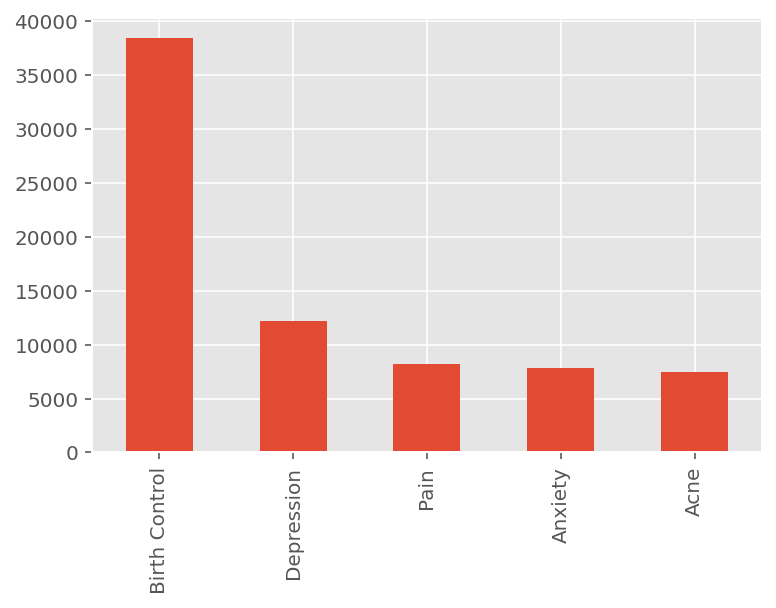

In [13]:
top_conditions.plot(kind='bar');

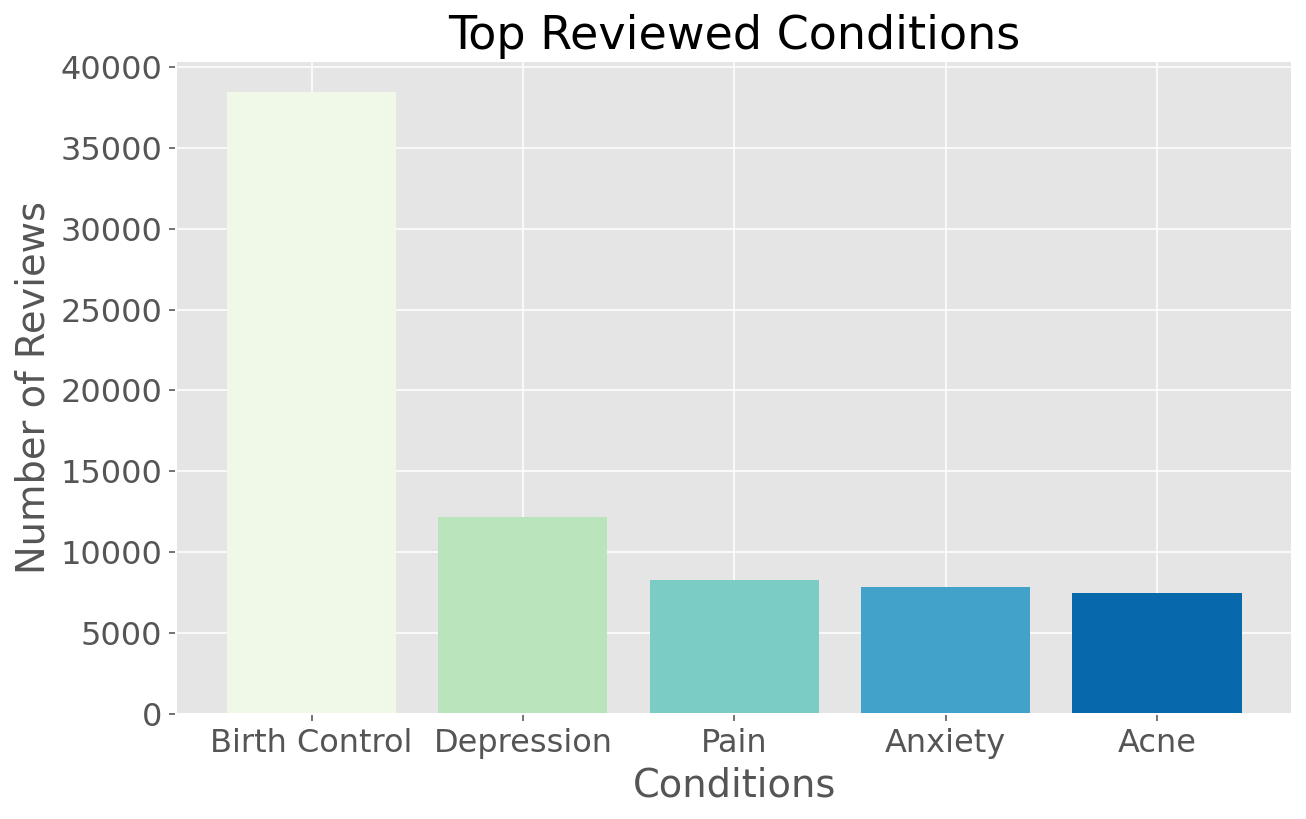

In [120]:
x = top_con['Condition']
y = top_con['Number of Reviews']
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(x, y, color = ['#f0f9e8', '#bae4bc', '#7bccc4', '#43a2ca', '#0868ac'])
ax.set_title("Top Reviewed Conditions")
ax.set_xlabel("Conditions")
ax.set_ylabel("Number of Reviews")
plt.tick_params(labelsize=16)
plt.savefig('TopConditions.jpg');


In [16]:
bc = new_data[new_data['condition'] == 'Birth Control']
dep = new_data[new_data['condition'] == 'Depression']
pain = new_data[new_data['condition'] == 'Pain']
anx = new_data[new_data['condition'] == 'Anxiety']
acne = new_data[new_data['condition'] == 'Acne']
bc2 = bc.groupby('drugName')

In [80]:
bc['drugName'].value_counts()
top_drug = pd.DataFrame({'Drug Name': ['Etonogestrel', 'Levonorgestrel', 'Nexplanon', 'Implanon', 'Mirena'], 'Number of Reviews': [4394, 2884, 2883, 1496, 1320]})

In [81]:
x2 = top_drug['Drug Name']
y2 = top_drug['Number of Reviews']

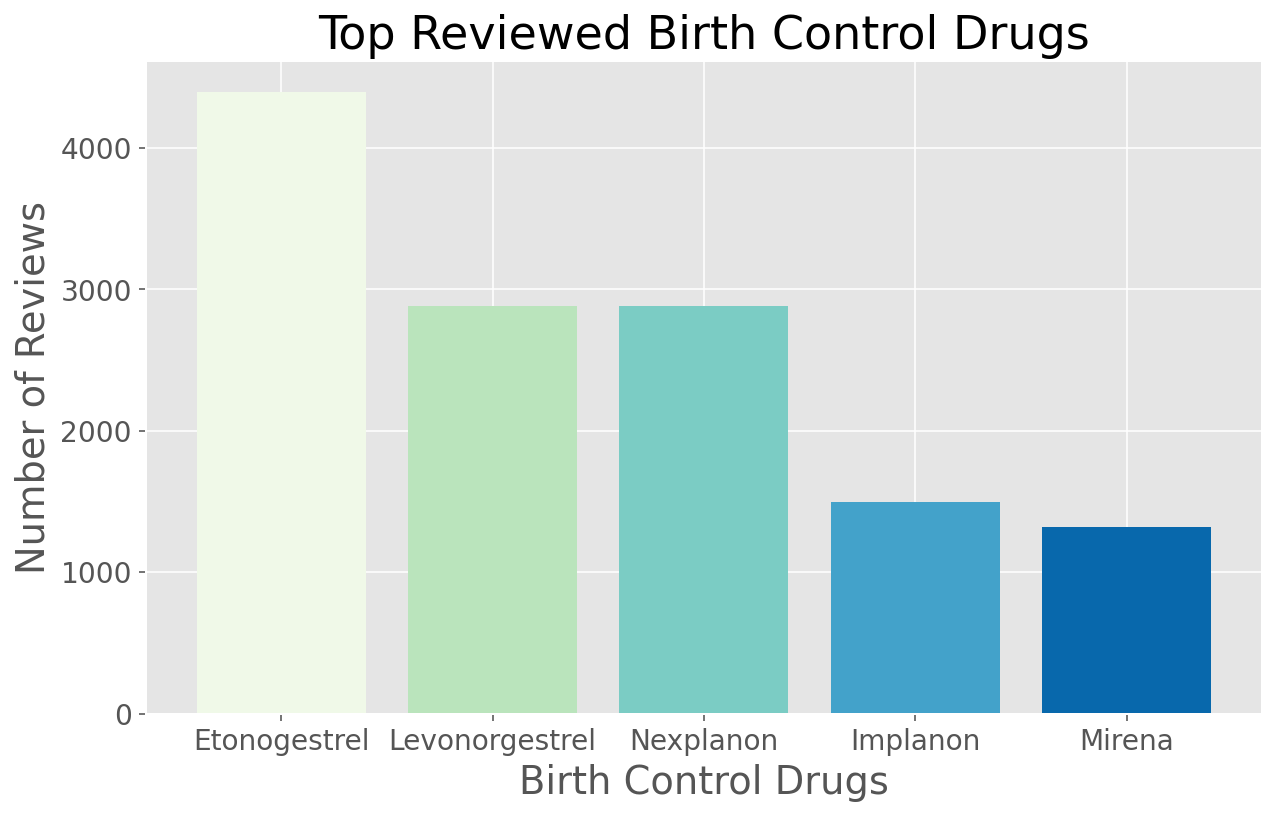

In [119]:
x = top_con['Condition']
y = top_con['Number of Reviews']
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(x2, y2, color = ['#f0f9e8', '#bae4bc', '#7bccc4', '#43a2ca', '#0868ac'])
ax.set_title("Top Reviewed Birth Control Drugs")
ax.set_xlabel("Birth Control Drugs")
ax.set_ylabel("Number of Reviews")
plt.tick_params(labelsize=14)
#plt.xticks(rotation=15)
plt.savefig('TopBCDrugs.jpg');

In [ ]:
ten

<AxesSubplot:>

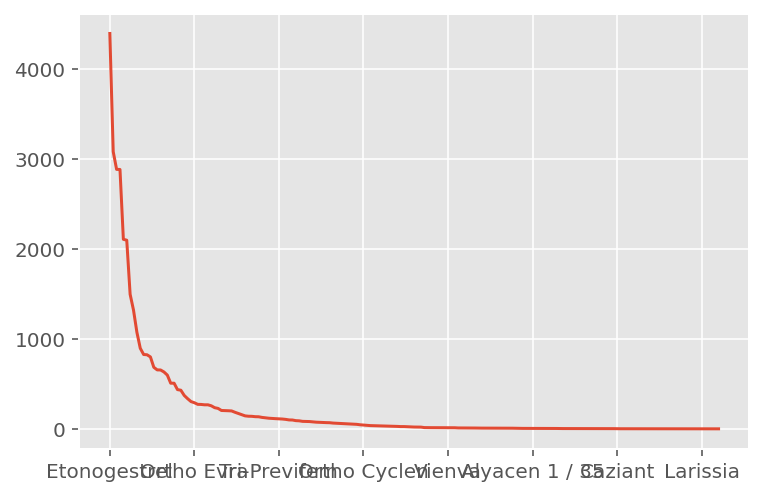

In [18]:
hi = bc['drugName'].value_counts()
hi.plot()

In [19]:
#bc['drugName'].value_counts()

In [20]:
list(bc.columns)

['condition', 'drugName', 'rating']

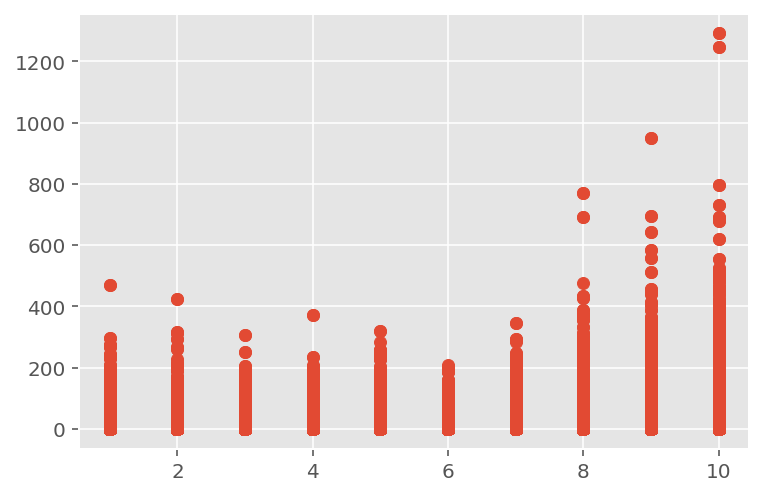

In [22]:
fig, ax = plt.subplots()
ax.scatter(data['rating'],data['usefulCount']);

In [23]:
bc[bc['drugName'] == 'Etonogestrel'].mean()

rating    5.829768
dtype: float64

In [24]:
est = bc[bc['drugName'] == 'Etonogestrel']

In [25]:
estr = est['rating']

In [26]:
bc[bc['drugName'] == 'Implanon'].mean()

rating    6.175134
dtype: float64

In [27]:
bc[bc['drugName'] == 'Nexplanon'].mean()

rating    5.64967
dtype: float64

In [28]:
bc[bc['drugName'] == 'NuvaRing'].mean()

rating    6.640777
dtype: float64

In [149]:
df = pd.DataFrame({'Drug Name': ['Etonogestrel (generic)', 'Implanon', 'Nexplanon', 'NuvaRing'], 'Avg Rating': [5.829768, 6.175134, 5.64967, 6.640777]})

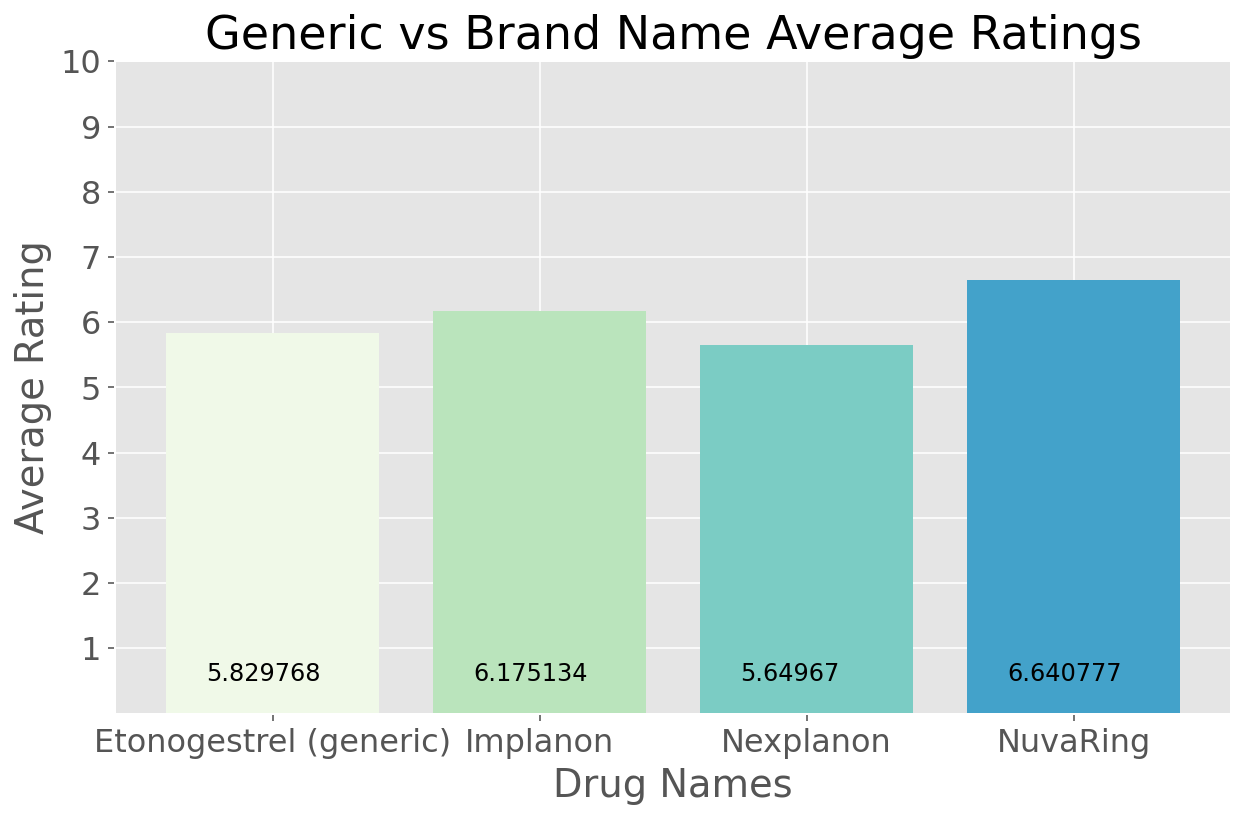

In [152]:
x3 = df['Drug Name']
y3 = df['Avg Rating']
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(x3, y3, color = ['#f0f9e8', '#bae4bc', '#7bccc4', '#43a2ca'])
ax.set_title("Generic vs Brand Name Average Ratings")
ax.set_xlabel("Drug Names")
ax.set_ylabel("Average Rating")
ax.set_yticks(range(1, 11))
plt.tick_params(labelsize=16)
for i, v in enumerate(y3):
    ax.text(i-.25, 
              v/y3[i]-.5, 
              y3[i], 
              fontsize=12, 
              color='black')
plt.savefig('GenericVBrand.jpg');

In [44]:
bc['drugName'].value_counts()

Etonogestrel                                               4394
Ethinyl estradiol / norethindrone                          3081
Levonorgestrel                                             2884
Nexplanon                                                  2883
Ethinyl estradiol / levonorgestrel                         2107
Ethinyl estradiol / norgestimate                           2097
Implanon                                                   1496
Mirena                                                     1320
Skyla                                                      1074
Lo Loestrin Fe                                              896
Ethinyl estradiol / etonogestrel                            827
NuvaRing                                                    824
Copper                                                      800
Drospirenone / ethinyl estradiol                            685
Medroxyprogesterone                                         656
Desogestrel / ethinyl estradiol         

In [32]:
dep[dep['drugName'] == 'Bupropion'].mean()

rating    7.386881
dtype: float64

In [33]:
dep[dep['drugName'] == 'Wellbutrin'].mean()

rating    7.347826
dtype: float64

In [34]:
dep[dep['drugName'] == 'Wellbutrin XL'].mean()

rating    7.782609
dtype: float64

In [35]:
dep[dep['drugName'] == 'Wellbutrin SR'].mean()

rating    6.788732
dtype: float64

In [36]:
dep[dep['drugName'] == 'Forfivo XL'].mean()

rating    10.0
dtype: float64

In [37]:
dep[dep['drugName'] == 'Aplenzin'].mean()

rating    6.142857
dtype: float64

In [38]:
dep[dep['drugName'] == 'Budeprion SR'].mean()

rating    8.333333
dtype: float64

In [39]:
dep[dep['drugName'] == 'Budeprion XL'].mean()

rating    6.928571
dtype: float64

In [40]:
anx[anx['drugName'] == 'Propranolol'].mean()

rating    7.990991
dtype: float64

In [41]:
dep.groupby('drugName').mean().sort_values('rating')

,rating
drugName,
Vyvanse,3.000000
Luvox CR,4.000000
Fetzima,4.666667
Levomilnacipran,4.784615
Tryptophan,5.000000
Pamelor,5.000000
Strattera,5.666667
Effexor,5.783784
Vortioxetine,5.934498
